In [88]:
from fonctions import *

dic_EN = lire_json('entites_nommees.json')

chemins_articles = [x for x in dic_EN.keys()]
liste_tagEN = [x[1] for x in dic_EN.values()]
liste_titres = [x[2] for x in dic_EN.values()]

liste_journaux = get_liste_journaux(chemins_articles)

X, V = creer_X(liste_tagEN, 1, 1)

print(X[0])

[0. 0. 0. 0.]


In [89]:
from scipy.spatial.distance import cdist
from sklearn import metrics 

distortions = [] 
inertias = []
K = range(1,10)

for k in K: # test en allant de 1 à 9 clusters
    kmeanModel = creer_model_KM(k, X)
    
    dic_eff = effectifs_clusters(kmeanModel)
    print(dic_eff)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)

{0: 5685}
{1: 3850, 0: 1835}
{0: 2715, 1: 1304, 2: 1666}
{1: 1848, 3: 1152, 2: 1006, 0: 1679}
{3: 1390, 2: 1050, 0: 764, 4: 868, 1: 1613}
{1: 1390, 2: 652, 3: 764, 4: 868, 0: 1533, 5: 478}
{1: 1390, 2: 629, 6: 290, 3: 671, 4: 715, 0: 1533, 5: 457}
{0: 1390, 2: 629, 6: 271, 4: 481, 3: 706, 1: 1493, 5: 451, 7: 264}
{1: 1390, 3: 629, 7: 273, 4: 517, 0: 332, 2: 1470, 6: 410, 5: 451, 8: 213}


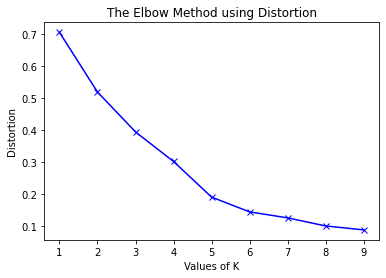

In [90]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

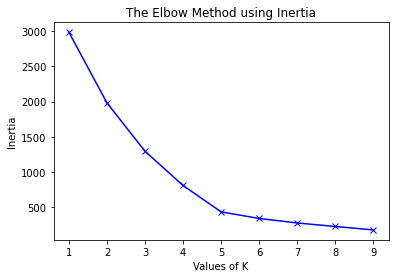

In [91]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [7]:
model = creer_model_KM(5, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[1 2 4 1 4 3 4 2 0 0 3 0 0 2 4 4 0 1 2 1 2 2 4 1 3 0 3 0 0 0 0 0 3 3 1 2 3
 3 3 3 4 2 4 4 4 0 0 3 4 0 3 0 2 4 3 1 2 4 2 0 3 3 3 0 1 1 1 0 3 1 0 4 1 0
 1 0 3 3 3 2 4 4 4 3 0 2 2 0 0 2 3 4 3 0 4 4 2 4 2 4]
{1: 1131, 2: 900, 4: 802, 3: 1229, 0: 1623}


In [22]:
dictionnaire = dic_complet(X, predictions, liste_tagEN, liste_titres, liste_journaux)

afficher_titres_hasard(3, dictionnaire)

Cluster 0 : 1623 articles
Les réactions dhypersensibilité au Gardasil sont rares
_ LOC
Elmoudjahid
La Grèce s'embrase après la mort d'un jeune tué par un policier
_ LOC
Elmoudjahid
Réveillon - Cette période de lannée est vécue comme une trêve pour les restaurateurs
_ LOC
Elmoudjahid
----------
Cluster 1 : 1131 articles
"Le gouvernement israélien est suicidaire"
_
nicematin
Les 10 innovations numériques les plus marquantes en vidéo
_
nicematin
L'insécurité alimentaire demeure
_
nicematin
----------
Cluster 2 : 900 articles
SANTÉ Infections nosocomiales : "Léo en a pour toute sa vie"
_ ORG PER
francesoir
Dépêche : HARARE (AFP) - Zimbabwe: pressions occidentales sur Mugabe, nouveau billet de 200 millions
_ ORG LOC PER
francesoir
Zimbabwe: l'UE décidée à faire pression pour que Mugabe parte
_ LOC ORG PER
francesoir
----------
Cluster 3 : 1229 articles
Détournements : Roudolph Mbangue et des ex-collaborateurs au tribunal
_ PER PER
levif
Médecine : première greffe quasi-totale d'un visage au

In [23]:
dimensions_clusters(model, V)

Cluster 0:
(LOC) | (PER) | (ORG) | (MISC) | 
----------
Cluster 1:
(LOC) | (ORG) | (MISC) | (PER) | 
----------
Cluster 2:
(ORG) | (LOC) | (PER) | (MISC) | 
----------
Cluster 3:
(PER) | (LOC) | (MISC) | (ORG) | 
----------
Cluster 4:
(MISC) | (LOC) | (PER) | (ORG) | 
----------


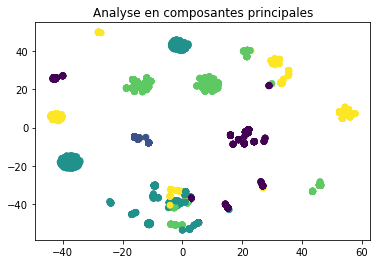

In [24]:
tracer_ACP(X, predictions)